# Motivating Example

> ### You have been given a bunch of data files. You need to make a plot.

It could be that this is some quick plot that you need for a one-time purpose, or it could be the beginning of your new reaserch project. 

In this example we have been given the census data for Tasmania and we would like to make a plot of the average number of births per gender for the 19th century.

We have been given 17 data files in comma-separated-values (CSV) format. 

Data Source: https://data.gov.au/data/dataset/tasmanian-births-1803-1933

In [1]:
import glob # Find files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
seaborn.set() # Prettier plots

In [2]:
# Get (compressed) CSV files in the data folder
matching_files = glob.glob('../data/tasmania*.csv.bz2')

In [3]:
def read_file(fn, index_col='NI_BIRTH_DATE', columns=None):
    """ Helper function to read CSV files """
    
    return pd.read_csv(fn, # Filename inside loop
                       index_col=index_col, # Index column
                       parse_dates=True, # Parse columns that look like dates
                       usecols=columns, # Only use columns above
                      ).rename(columns=columns)

In [4]:
# Dictionary used for renaming columns
columns = {
    'NI_BIRTH_DATE': 'birth_date',
    'NI_GENDER': 'gender',
    'NI_NAME_FACET': 'name'
}

In [5]:
# Load the birth data for each decade
birth_data = pd.concat([read_file(fn, columns=columns)
                           for fn # Filename for each matching file
                           in matching_files
                       ])

# Add a one-hot column for aggregating
birth_data['val'] = 1

# Filter down to just the dates we want as an example
birth_data = birth_data['1800-01-01':'1900-01-01']

In [6]:
# Get the total counts for display
totals = birth_data.groupby('gender').sum().val.to_dict()
totals

{'Female': 101984, 'Male': 107721, 'Not stated': 28}

In [7]:
# Get the 5 year sum for each gender group
gender_data = birth_data.groupby('gender').resample('5Y').sum().unstack('gender').droplevel(0, axis=1).fillna(0)

# Use just the years for the index - no longer a time index
gender_data.index = gender_data.index.year

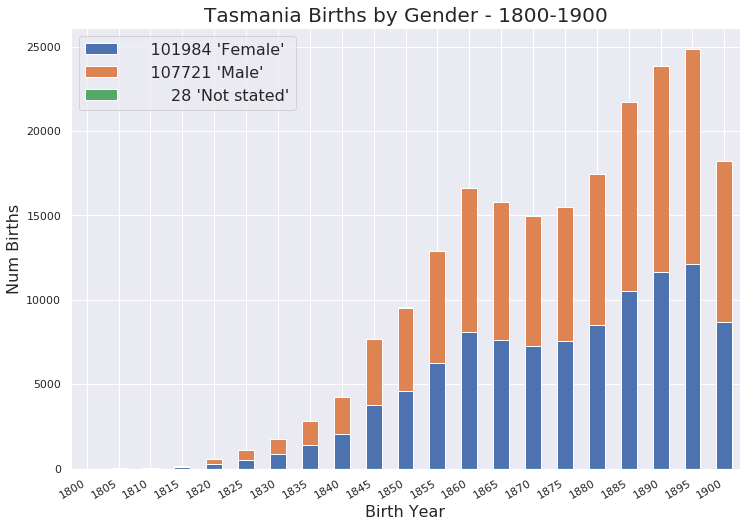

In [8]:
# Plot the births per year
ax = gender_data.plot(kind='bar', stacked=True, figsize=(12, 9))

# Fix the date labels
ax.get_figure().autofmt_xdate()

# Add labels and title
ax.set_xlabel('Birth Year', fontsize=16)
ax.set_ylabel('Num Births', fontsize=16)
ax.set_title('Tasmania Births by Gender - 1800-1900', fontsize=20)

ax.legend([f'{total:10d} {gender!r}' for gender, total in totals.items()], fontsize=16)

plt.show()

# Where to?

Time to check our [Programming Style](ProgrammingStyle.ipynb)